In [235]:
import sympy 
import numpy as np
import matplotlib.pyplot as plt

from timeit import default_timer
from mpl_toolkits import mplot3d

In [236]:
def const_gd(fn, grad_funcs, init_x, alpha=0.1, iterations=50):
    start = default_timer()
    x = init_x[0]
    y = init_x[1]
    X = np.array([x])
    Y = np.array([y])
    func_vals = np.array(fn(x, y))
    
    for i in range(iterations):
        step_x1 = alpha * grad_funcs[0](x)
        x = x - step_x1
        X = np.append(X, [x], axis=0)
        step_x2 = alpha * grad_funcs[1](y)
        y = y - step_x2
        Y = np.append(Y, [y], axis=0)
        
        func_vals = np.append(func_vals, fn(x, y))
    
    run_time = default_timer() - start
    return (X, Y, func_vals, run_time)
        
        

In [237]:
def random_search(fn, x_range, N, n):
    start = default_timer()
    X = []
    cost_x = []
    func_vals = []
    mcf = float('inf')
    for i in range(N):
        for j in range(n):
            cost_x.insert(j, np.random.uniform(low=x_range[0], high=x_range[1]+1))
        cost_function = fn(cost_x)
        if (cost_function < mcf):
            X = np.append(X, cost_x, axis=0)
            func_vals = np.append(func_vals, cost_function)
            mcf = cost_function
    run_time = default_timer() - start
    return (X, func_vals, run_time)


In [238]:
def mod_random_search(fn, x_range, N, M, n):
    X = []
    cost_x = []
    x_delta = []
    func_vals = []
    mcf = float('inf')
    for i in range(N):
        for j in range(n):
            cost_x[j] = np.random.uniform(low=x_range[0], high=x_range[1]+1)
        cost_function = fn(cost_x)
        if (cost_function < mcf):
            X = np.append(X, cost_x, axis=0)
            func_vals = np.append(func_vals, cost_function)
            mcf = cost_function
    start = default_timer()
    for i in range(N):        
        cost_x = cost_x[-M:]
        func_vals = func_vals[-M:]

        for j in range(M):
            for k in range (N//M):
                delta = np.random.uniform(low=0.01, high=0.06)
                for l in range(n):
                    x_delta[l] = cost_x[l] + delta
                cost_function = fn(x_delta)
                if (abs(cost_function) < mcf):
                    X = np.append(X, x_delta, axis=0)
                    func_vals = np.append(func_vals, cost_function)
                    mcf = abs(cost_function)

    run_time = default_timer() - start
    return (X, func_vals, run_time)

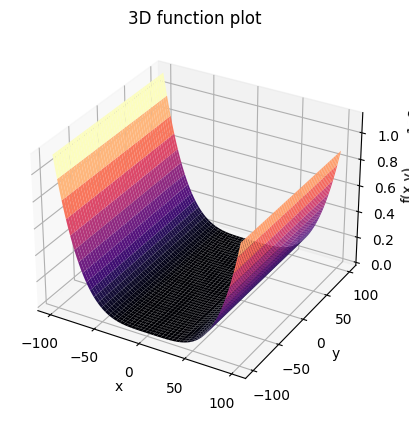

In [244]:

x1, x2 = sympy.symbols("x1 x2", real=True)

f1 = 1*(x1-3)**4+4*(x2-7)**2
f2 = np.max(x1-3,0)+4*abs(x2-7)

diff_x1 = sympy.diff(f1, x1)
diff_x2 = sympy.diff(f1, x2)
    
fx1 = sympy.lambdify((x1, x2), f1, modules='numpy')
fx2 = sympy.lambdify((x1, x2), f2, modules='numpy')
def fn(args, f):
    return 1*(args[0]-3)**4+4*(args[1]-7)**2
dfdx1 = sympy.lambdify(x1, diff_x1)
dfdx2 = sympy.lambdify(x2, diff_x2)

grad = [dfdx1, dfdx2]

# Plot: 3D plot for x,y and function
x_scale = np.arange(-100,100.1,0.1)
y_scale = np.arange(-100,100.1,0.1)
x, y = np.meshgrid(x_scale, y_scale)
plt.rcParams['axes.labelpad'] = 1
figure, axis = plt.subplots(subplot_kw={"projection": "3d"})
axis.plot_surface(x, y, fx1(x,y), cmap='magma')
axis.set_title("3D function plot")
axis.set_xlabel("x")
axis.set_ylabel("y")
axis.set_zlabel("f(x,y)")
plt.show()

In [240]:
(const_x1, const_x2, const_func_vals, const_run_time) = const_gd(fx1, grad, [1, 3], alpha=0.005, iterations=50)
(random_x1, random_x2, random_func_vals, random_run_time) = random_search(fx1, x_range=(0, 3), N=100, n=2)

constant_x1 = const_x1[const_func_vals.argmin()]
constant_x2 = const_x2[const_func_vals.argmin()]

global_random_x1 = random_x1[random_func_vals.argmin()]
global_random_x2 = random_x2[random_func_vals.argmin()]

print("Gradient Descent")
print("Minimum function = ",min(const_func_vals))
print("Run time = ",const_run_time)
print("Global Random Search")
print("Minimum function = ",min(random_func_vals))
print("Run time = ",random_run_time)

# Plot: function vs iteration
plt.plot(const_func_vals, label = "gradient_descent")
plt.plot(random_func_vals, label = "global_random")
plt.title("Log plot of f(x) v iteration")
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Plot: function vs time
plt.plot(const_run_time, min(const_func_vals), marker=".", label = "Grad Descent")
plt.plot(random_run_time, min(random_func_vals), marker=".", label = "Random")
plt.title("f(x) against time taken")
plt.xlabel('Run time')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Plot: contour and step plot
x_scale=np.arange(-30,40.1,1)
y_scale = np.arange(-200,200.1,1)
x_scale, y_scale = np.meshgrid(x_scale, y_scale)
plt.title("Contour Plot")
plt.contour(x_scale, y_scale, fx1(x_scale, y_scale), cmap='magma', linestyles='dashed', levels=20)
plt.ylim(-200,200)
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(constant_x1, constant_x2, label="Gradient descent")
plt.scatter(global_random_x1, global_random_x2, label="Global random")
plt.legend()
plt.show()


TypeError: _lambdifygenerated() missing 1 required positional argument: 'x2'

Global Random Search Modified
Minimum function value =  3.861387590716477
Run time =  0.03031039994675666
Function evaluations =  10000


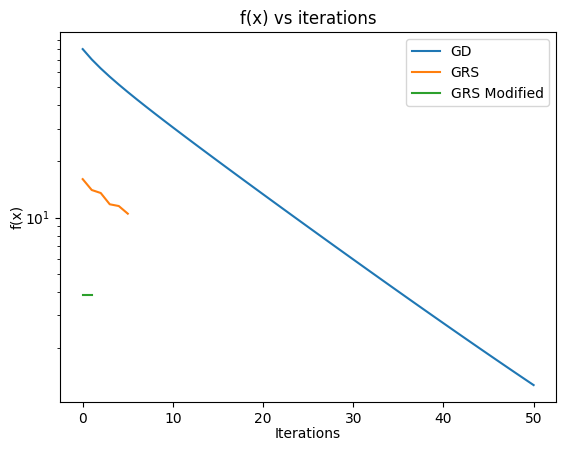

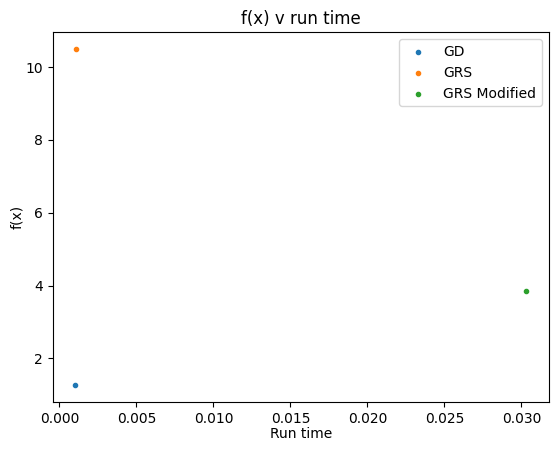

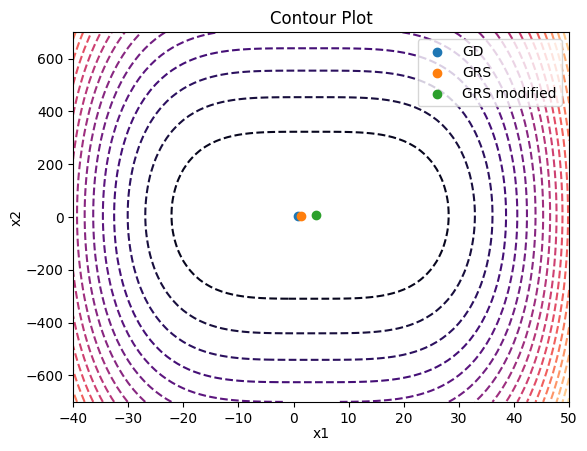

In [250]:
# (b) (ii) f(x1,x2) = Max(x1-5,0)+5*|x2-6|
(mod_random_x1, mod_random_x2, mod_random_func_vals, mod_random_run_time, mod_random_func_eval) = mod_random_search(fx=fx1, x1_range=(-1,1), x2_range=(0,3), N=100, M=2,n=2)


print("Global Random Search Modified")
print("Minimum function value = ",abs(min(mod_random_func_vals)))
print("Run time = ",mod_random_run_time)
print("Function evaluations = ", mod_random_func_eval)
mod_random_x1 = mod_random_x1[mod_random_func_vals.argmin()]
mod_random_x2 = mod_random_x2[mod_random_func_vals.argmin()]

# Plot: function vs iteration
plt.plot(const_func_vals, label = "GD")
plt.plot(random_func_vals, label = "GRS")
plt.plot(mod_random_func_vals, label = "GRS Modified")
plt.title("f(x) vs iterations")
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Plot: function vs time
plt.scatter(const_run_time, min(const_func_vals), marker=".", label = "GD")
plt.scatter(random_run_time, min(random_func_vals), marker=".", label = "GRS")
plt.scatter(mod_random_run_time, min(mod_random_func_vals), marker=".", label = "GRS Modified")
plt.title("f(x) v run time")
plt.xlabel('Run time')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Plot: contour and step plot
x_scale=np.arange(-40, 50.1, 1)
y_scale = np.arange(-700, 700.1, 1)
x_scale, y_scale = np.meshgrid(x_scale, y_scale)
plt.title("Contour Plot")
plt.contour(x_scale, y_scale, fx1(x_scale, y_scale), cmap='magma', linestyles='dashed', levels=20)
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(constant_x1, constant_x2, label="GD")
plt.scatter(global_random_x1, global_random_x2, label="GRS")
plt.scatter(mod_random_x1, mod_random_x2, label="GRS modified")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [ ]:
def conv_function(hyperparams):
    alpha = hyperparams[0]
    beta1 = hyperparams[1]
    beta2 = hyperparams[2]
    batch_size = hyperparams[3]
    epochs = hyperparams[4] 
    plt.rc('font', size=18)
    plt.rcParams['figure.constrained_layout.use'] = True
    import sys

    # Model / data parameters
    num_classes = 10
    input_shape = (32, 32, 3)

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    n=5000
    x_train = x_train[1:n]; y_train=y_train[1:n]
    #x_test=x_test[1:500]; y_test=y_test[1:500]

    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    print("orig x_train shape:", x_train.shape)

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    
    model = keras.Sequential()
    model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
    model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
    adam = tf.keras.optimizers.Adam(learning_rate=alpha, beta_1=beta1, beta_2=beta2)
    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
    model.summary()

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss'); plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    preds = model.predict(x_train)
    y_pred = np.argmax(preds, axis=1)
    y_train1 = np.argmax(y_train, axis=1)
    print(classification_report(y_train1, y_pred))
    print(confusion_matrix(y_train1,y_pred))

    preds = model.predict(x_test)
    y_pred = np.argmax(preds, axis=1)
    y_test1 = np.argmax(y_test, axis=1)
    print(classification_report(y_test1, y_pred))
    print(confusion_matrix(y_test1,y_pred))
    
    logistic_loss = tf.keras.losses.categorical_crossentropy(y_test, preds)
    return np.sum(logistic_loss)
    
    

In [ ]:
def random_search_conv(x_range, N, n):
    start = default_timer()
    X = []
    cost_x = []
    func_vals = []
    mcf = float('inf')
    for i in range(N):
        for j in range(n):
            cost_x.insert(j, np.random.uniform(low=x_range[0], high=x_range[1]+1))
        cost_function = conv_function(cost_x)
        if (cost_function < mcf):
            X = np.append(X, cost_x, axis=0)
            func_vals = np.append(func_vals, cost_function)
            mcf = cost_function
    run_time = default_timer() - start
    return (X, func_vals, run_time)


In [ ]:
def mod_random_search_conv(x_range, N, M, n):
    X = []
    cost_x = []
    x_delta = []
    func_vals = []
    mcf = float('inf')
    for i in range(N):
        for j in range(n):
            cost_x[j] = np.random.uniform(low=x_range[j][0], high=x_range[j][1]+1)
        cost_function = conv_function(cost_x)
        if (cost_function < mcf):
            X = np.append(X, cost_x, axis=0)
            func_vals = np.append(func_vals, cost_function)
            mcf = cost_function
    start = default_timer()
    for i in range(N):        
        cost_x = cost_x[-M:]
        func_vals = func_vals[-M:]

        for j in range(M):
            for k in range (N//M):
                delta = np.random.uniform(low=0.01, high=0.06)
                for l in range(n):
                    x_delta[l] = cost_x[l] + delta
                cost_function = conv_function(x_delta)
                if (abs(cost_function) < mcf):
                    X = np.append(X, x_delta, axis=0)
                    func_vals = np.append(func_vals, cost_function)
                    mcf = abs(cost_function)

    run_time = default_timer() - start
    return (X, func_vals, run_time)

In [ ]:
# Hyperparamters for the convuleted neiral net model
alpha = [0.001, 0.01, 0.1, 0.5,]
beta = [0.8, 0.9, 0.95, 0.99]
batch_size = [64, 128, 256, 512]
epochs = [10, 20, 50, 100]

x_range = [alpha, beta, beta, batch_size, epochs]

(random_batch_size, random_alphas, random_beta1,  random_beta2,  random_epoch, random_func_vals, random_run_time, random_evals) = random_search_conv(x_range=x_range, N=10, n=5)

(mod_random_batch_size, mod_random_alphas, mod_random_beta1,  mod_random_beta2,  mod_random_epoch, mod_random_func_vals, mod_random_run_time, mod_random_evals) = mod_random_search_conv(x_range=x_range, N=10, M=2, n=5)

print("Global Random Search")
print("Minimum function value = ",min(random_func_vals))
print("Run time = ", random_run_time)
print("Function evaluations = ", random_evals)
print("Batch_size = ", random_batch_size[random_func_vals.argmin()])
print("learning-rate = ",random_alphas[random_func_vals.argmin()])
print("Beta-1 = ",random_beta1[random_func_vals.argmin()])
print("Beta-2 = ",random_beta2[random_func_vals.argmin()])
print("Epochs = ",random_epoch[random_func_vals.argmin()])

print("Global Random Search Modified")
print("Minimum function value = ",min(mod_random_func_vals))
print("Run time = ", mod_random_run_time)
print("Function evaluations = ", mod_random_evals)
print("Batch_size = ", mod_random_batch_size[mod_random_func_vals.argmin()])
print("learning-rate = ",mod_random_alphas[mod_random_func_vals.argmin()])
print("Beta-1 = ",mod_random_beta1[mod_random_func_vals.argmin()])
print("Beta-2 = ",mod_random_beta2[mod_random_func_vals.argmin()])
print("Epochs = ",mod_random_epoch[mod_random_func_vals.argmin()])

# Plot: function vs time
plt.scatter(random_run_time, min(random_func_vals), label = "GRS")
plt.scatter(mod_random_run_time, min(mod_random_func_vals), label = "GRS modified")
plt.title("f(x) v run time")
plt.xlabel('Run time')
plt.ylabel('f(x)')
plt.legend()
plt.show()